# Imputation use regression method

Country---Country

Year---Year

Status---Developed or Developing status

Life expectancy---Life Expectancy in age

Adult Mortality---Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

infant deaths---Number of Infant Deaths per 1000 population

Alcohol---Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

percentage expenditure---Expenditure on health as a percentage of Gross Domestic Product per capita(%)

Hepatitis B---Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

Measles---Measles - number of reported cases per 1000 population

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('Life_Expectancy_Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
#sns.pairplot(df)

In [8]:
df['Country'].unique()
print(df['Year'].unique())
print(df['Status'].unique() )

[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000]
['Developing' 'Developed']


In [9]:
df.drop('Country',axis=1,inplace=True)

In [10]:
df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

coding some variables

In [11]:
# Import Label encoder
from sklearn import preprocessing


l=['Year','Status']
for i in l:
    label_encoder=preprocessing.LabelEncoder()
    
    label_encoder.fit(df[i])
    print(i,label_encoder.classes_)
    
    df[i]=label_encoder.transform(df[i])
    
df.head()

Year [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
Status ['Developed' 'Developing']


,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,15,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,14,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,13,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,12,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,11,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


C:\Users\DeLL\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Life expectancy ', ylabel='Density'>

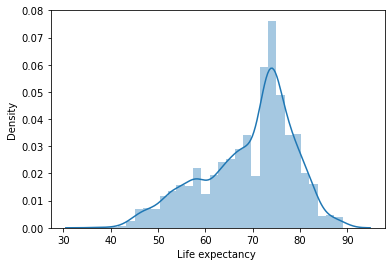

In [12]:
#for assumption checking---normality
sns.distplot(df['Life expectancy '])

<AxesSubplot:>

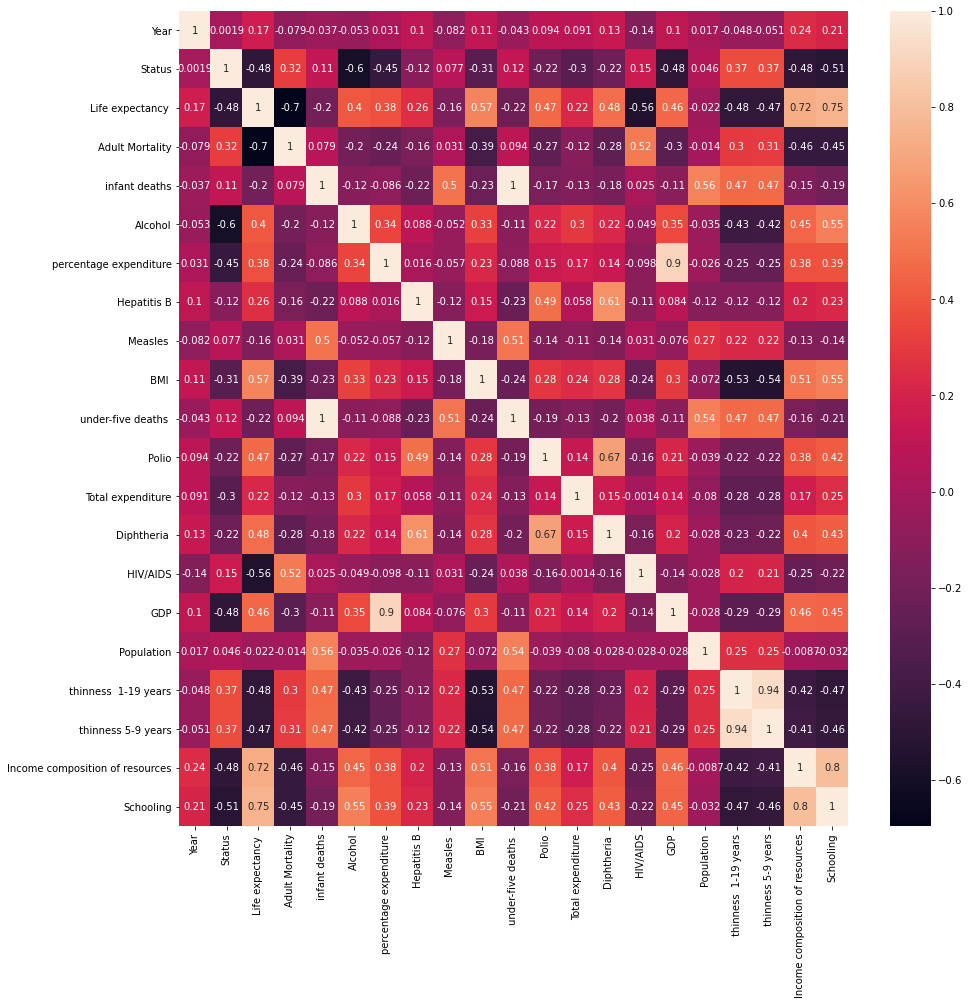

In [13]:
#import seaborn as sns
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [14]:
df.corr()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.001864,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,...,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Status,0.001864,1.000000,-0.482136,0.315284,0.112252,-0.596660,-0.454261,-0.115317,0.076955,-0.311257,...,-0.220250,-0.299990,-0.216913,0.148590,-0.478339,0.045801,0.368389,0.366751,-0.478402,-0.514045
Life expectancy,0.170033,-0.482136,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,...,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,0.315284,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,...,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,0.112252,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,...,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,-0.596660,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,...,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,-0.454261,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,...,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,-0.115317,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,...,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,0.076955,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,...,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,-0.311257,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,...,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961


Known completely-----------------------------

infant deaths                        0

percentage expenditure               0

Measles                              0

under-five deaths                    0

HIV/AIDS                            0

Unknown variables---------------------------

# For fill out missing values variable now we fit model on that variables using other available complete data/variables

In [15]:
l=['Adult Mortality','Alcohol','Hepatitis B',' BMI ','Polio','Total expenditure','Diphtheria ','GDP','Population',
   ' thinness  1-19 years',' thinness 5-9 years','Income composition of resources','Schooling']

for i in l:
    d=df[df[i].isnull()].index.tolist()

    df1=df.drop(df.index[[d]])
    
    #fit regression model
    
    y=df1[i]
    x=df1[['infant deaths','percentage expenditure','Measles ','under-five deaths ',' HIV/AIDS']]
    
    from sklearn.model_selection import train_test_split

    x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.3,random_state=101)
    
    from sklearn.linear_model import LinearRegression

    lm=LinearRegression()

    lm.fit(x_tr,y_tr) 
    
    print("Fitted model is given as :",i," = ",round(lm.intercept_,4),"+ ",round(lm.coef_[0],4),"infant deaths + ",
          round(lm.coef_[1],4),"percentage expenditure  + ",round(lm.coef_[2],4),"Measles  + ",
          round(lm.coef_[3],4),"under-five deaths  + ",round(lm.coef_[4],4)," HIV/AIDS")

    # Prediction
    y_pred1=lm.predict(x_te);
    #y_pred1
    
    # For fill out missing value in Age variable now we fit model on Age using other available complete data
    
    df[i]=np.where(df[i].isnull(),round(lm.intercept_,4)+ round(lm.coef_[0],4)* df['infant deaths']+
                   round(lm.coef_[1],4)*df['percentage expenditure']+round(lm.coef_[2],4)*df['Measles ']+
                   round(lm.coef_[3],4)*df['under-five deaths ']+round(lm.coef_[4],4)*df[' HIV/AIDS'],df[i])
    


C:\Users\DeLL\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:4307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


Fitted model is given as : Adult Mortality  =  150.4333 +  -1.3987 infant deaths +  -0.0117 percentage expenditure  +  -0.0004 Measles  +  1.0936 under-five deaths  +  11.8098  HIV/AIDS
Fitted model is given as : Alcohol  =  4.0993 +  -0.0328 infant deaths +  0.0007 percentage expenditure  +  -0.0 Measles  +  0.0219 under-five deaths  +  -0.0134  HIV/AIDS
Fitted model is given as : Hepatitis B  =  82.7942 +  0.328 infant deaths +  -0.0003 percentage expenditure  +  -0.0001 Measles  +  -0.2784 under-five deaths  +  -0.4103  HIV/AIDS
Fitted model is given as :  BMI   =  38.9432 +  0.1534 infant deaths +  0.002 percentage expenditure  +  -0.0001 Measles  +  -0.1345 under-five deaths  +  -0.7576  HIV/AIDS
Fitted model is given as : Polio  =  84.1144 +  0.4656 infant deaths +  0.0013 percentage expenditure  +  -0.0001 Measles  +  -0.3705 under-five deaths  +  -0.4965  HIV/AIDS


C:\Users\DeLL\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:4307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)
C:\Users\DeLL\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:4307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)
C:\Users\DeLL\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:4307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arr

Fitted model is given as : Total expenditure  =  5.8472 +  0.0031 infant deaths +  0.0002 percentage expenditure  +  -0.0 Measles  +  -0.0036 under-five deaths  +  0.0115  HIV/AIDS
Fitted model is given as : Diphtheria   =  84.0944 +  0.5378 infant deaths +  0.0014 percentage expenditure  +  -0.0001 Measles  +  -0.4219 under-five deaths  +  -0.565  HIV/AIDS
Fitted model is given as : GDP  =  2497.0328 +  12.397 infant deaths +  5.9781 percentage expenditure  +  -0.0075 Measles  +  -11.1566 under-five deaths  +  -92.1277  HIV/AIDS
Fitted model is given as : Population  =  4629567.1303 +  1200426.5557 infant deaths +  535.9013 percentage expenditure  +  119.2918 Measles  +  -691590.4402 under-five deaths  +  -116079.6426  HIV/AIDS
Fitted model is given as :  thinness  1-19 years  =  4.4933 +  0.0018 infant deaths +  -0.0005 percentage expenditure  +  -0.0 Measles  +  0.0111 under-five deaths  +  0.1415  HIV/AIDS


C:\Users\DeLL\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:4307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)
C:\Users\DeLL\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:4307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)
C:\Users\DeLL\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:4307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arr

Fitted model is given as :  thinness 5-9 years  =  4.511 +  0.0048 infant deaths +  -0.0005 percentage expenditure  +  -0.0 Measles  +  0.0096 under-five deaths  +  0.1463  HIV/AIDS
Fitted model is given as : Income composition of resources  =  0.6189 +  0.0042 infant deaths +  0.0 percentage expenditure  +  -0.0 Measles  +  -0.0032 under-five deaths  +  -0.0073  HIV/AIDS
Fitted model is given as : Schooling  =  11.8267 +  0.0489 infant deaths +  0.0006 percentage expenditure  +  0.0 Measles  +  -0.0393 under-five deaths  +  -0.0938  HIV/AIDS


In [16]:
d1=df[df['Life expectancy '].isnull()].index.tolist()

df=df.drop(df.index[[d1]])
df

C:\Users\DeLL\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:4307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,15,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,14,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,13,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,12,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,11,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,4,1,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,3,1,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2,1,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,1,1,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [17]:
df.isnull().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [18]:
y=df['Life expectancy ']
x=df[['Year', 'Status', 'Adult Mortality','infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure','Diphtheria ', ' HIV/AIDS', 'GDP', 
       'Population',' thinness  1-19 years', ' thinness 5-9 years','Income composition of resources', 'Schooling']]
np.shape(x)

(2928, 20)

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
print(x_train.shape)
print(x_test.shape)

(2049, 20)
(879, 20)


# Evaluating  using regression model

In [20]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(x_train,y_train)   

LinearRegression()

In [21]:
# Prediction
y_pred=lm.predict(x_test);
#y_pred

In [22]:
print("Intercept :\n ",lm.intercept_)
print("coefficients :\n ",lm.coef_)
print("R square : \n", lm.score(x_train,y_train))

Intercept :
  55.43370797932731
coefficients :
  [-2.15390485e-02 -1.50524452e+00 -1.85119464e-02  1.10750391e-01
  5.00490760e-02  3.27897935e-05 -1.94020256e-02 -2.03443725e-05
  4.66579868e-02 -8.27619977e-02  3.02067051e-02  3.66363340e-02
  4.27525377e-02 -4.55176370e-01  4.01955529e-05 -1.41707695e-09
 -8.66208968e-02  3.73004668e-02  5.86321018e+00  7.37015951e-01]
R square : 
 0.824553673607747


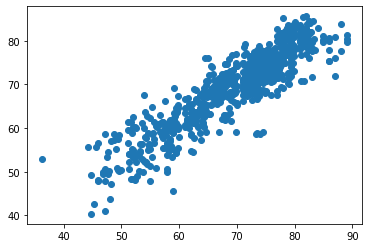

In [23]:
plt.scatter(y_test,y_pred)

In [24]:
# MAE,MSE and RMSE
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

MAE1=mean_absolute_error(y_test,y_pred)
MSE1=mean_squared_error(y_test,y_pred)
RMSE1=sqrt(MSE1)

print("MAE1: ",MAE1)
print("MSE1: ",MSE1)
print("RMSE1: ",RMSE1)

MAE1:  2.929092595665652
MSE1:  15.463505558835523
RMSE1:  3.932366406991536


In [25]:
print("R square : \n", lm.score(x_train,y_train))

R square : 
 0.824553673607747


Thus this model explained 82.45 % variability in life expentancy when missing values are replace using regression model .